In [1]:
import os
import numpy as np
import random

def read_text_files(folder_path):
    """Reads all text files in the given folder."""
    contents = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Check if it's a file and has .txt extension
        if os.path.isfile(file_path) and filename.endswith(".txt"):
            with open(file_path, "r") as file:
                content = file.read()
                contents.append(content)
    return contents

In [2]:
# Training set
train_positive_reviews = read_text_files("data/aclImdb/train/pos/")
train_negative_reviews = read_text_files("data/aclImdb/train/neg/")
train_reviews = train_positive_reviews + train_negative_reviews
y_train = np.array([1]*12500 + [0]*12500)
#Test set
test_positive_reviews = read_text_files("data/aclImdb/test/pos/")
test_negative_reviews = read_text_files("data/aclImdb/test/neg/")
test_reviews = test_positive_reviews + test_negative_reviews
y_test = np.array([1]*12500 + [0]*12500)

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
vocab = 10000
tokens = Tokenizer(num_words=vocab)
tokens.fit_on_texts(train_reviews)

In [5]:
word_index = tokens.word_index
sequence_train = tokens.texts_to_sequences(train_reviews)

In [6]:
word_num = 500
x_train = pad_sequences(sequence_train,maxlen = word_num)

FOR TEST

In [7]:
word_index = tokens.word_index
sequence_test = tokens.texts_to_sequences(test_reviews)
x_test = pad_sequences(sequence_test,maxlen=word_num)

SPLIT TRAIN & VALIDATION

In [8]:
n = x_train.shape[0]
np.random.seed(42)
ren_perm = np.random.permutation(n)
n_valid = int(n*0.2)
x_valid = x_train[ren_perm[0:n_valid]]
y_valid = y_train[ren_perm[0:n_valid]]
x_train = x_train[ren_perm[n_valid:n]]
y_train = y_train[ren_perm[n_valid:n]]

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Embedding , SimpleRNN


HYPER PARAM

In [10]:
vocab = 10000 #unique words in dictionary
embedding_dim = 32
word_num = 500 #sequence length
state_dim = 32

In [11]:

model = Sequential()
model.add(Input((word_num,)))
model.add(Embedding(vocab , embedding_dim))
model.add(SimpleRNN(state_dim, return_sequences=False )) #return_seq as true will give us all the outputs of hidden state h0 to ht which means it can be used for hypertuning the model for better accuracy but in this case the accuracy remains the same
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['acc'])

In [13]:
hostory = model.fit(x_train, y_train , epochs= 5, batch_size=32 , validation_data=(x_valid,y_valid))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 140ms/step - acc: 0.5053 - loss: 0.6956 - val_acc: 0.5332 - val_loss: 0.6903
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - acc: 0.5764 - loss: 0.6802 - val_acc: 0.5558 - val_loss: 0.6839
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - acc: 0.6604 - loss: 0.6424 - val_acc: 0.6236 - val_loss: 0.6391
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - acc: 0.7791 - loss: 0.4993 - val_acc: 0.8056 - val_loss: 0.4557
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - acc: 0.8268 - loss: 0.4113 - val_acc: 0.8162 - val_loss: 0.4216


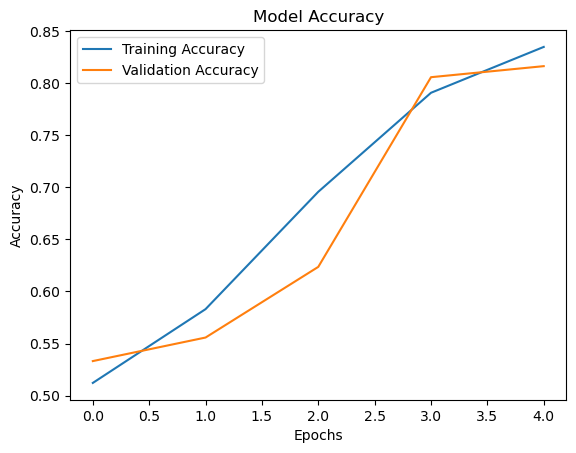

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(hostory.history['acc'], label='Training Accuracy')
plt.plot(hostory.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

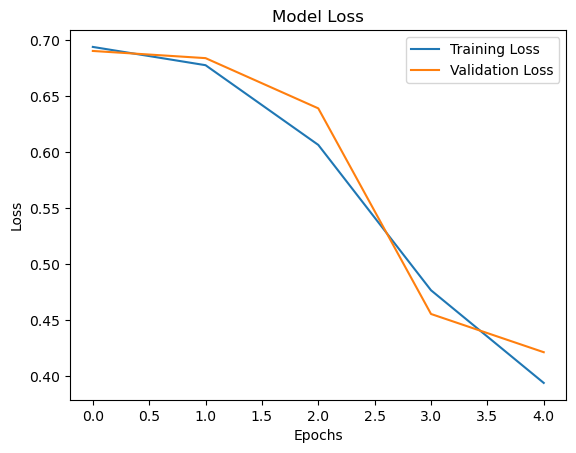

In [15]:
# Plot training and validation loss
plt.plot(hostory.history['loss'], label='Training Loss')
plt.plot(hostory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
loss_and_acc = model.evaluate(x_test, y_test)
print('loss = ' + str(loss_and_acc[0]))
print('acc = ' + str(loss_and_acc[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - acc: 0.7795 - loss: 0.4728
loss = 0.42095062136650085
acc = 0.8169199824333191


# Building an LSTM model

In [17]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Embedding, Dense 

In [18]:
vocab = 10000
embed_dim = 32
word_num = 500
state_dim = 32


model = Sequential()
model.add(Input((word_num,)))
model.add(Embedding(vocab,embed_dim))
model.add(LSTM(state_dim,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from keras import optimizers
model.compile(optimizer= optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['acc'])

In [20]:
history = model.fit(x_train,y_train, epochs = 10 , batch_size=32 , validation_data=(x_valid,y_valid))

Epoch 1/10


625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 248ms/step - acc: 0.5242 - loss: 0.6926 - val_acc: 0.6324 - val_loss: 0.6866
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - acc: 0.6773 - loss: 0.6421 - val_acc: 0.8060 - val_loss: 0.4646
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - acc: 0.8284 - loss: 0.4209 - val_acc: 0.8612 - val_loss: 0.3459
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - acc: 0.8761 - loss: 0.3157 - val_acc: 0.8648 - val_loss: 0.3358
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - acc: 0.8988 - loss: 0.2693 - val_acc: 0.8446 - val_loss: 0.4092
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - acc: 0.9127 - loss: 0.2351 - val_acc: 0.8870 - val_loss: 0.2857
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - acc: 0.9225 - loss: 0.2117 - val_acc: 0.8818 - val_loss: 0.2835
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - acc: 0.9280 - loss: 0.1990 - val_acc: 0.8858 - val_loss: 0.2889
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━

In [21]:
loss_and_acc = model.evaluate(x_test,y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - acc: 0.8412 - loss: 0.3964


In [22]:
print('loss = ' + str(loss_and_acc[0]))
print('acc = ' + str(loss_and_acc[1]))

loss = 0.3233503997325897
acc = 0.8719199895858765


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step


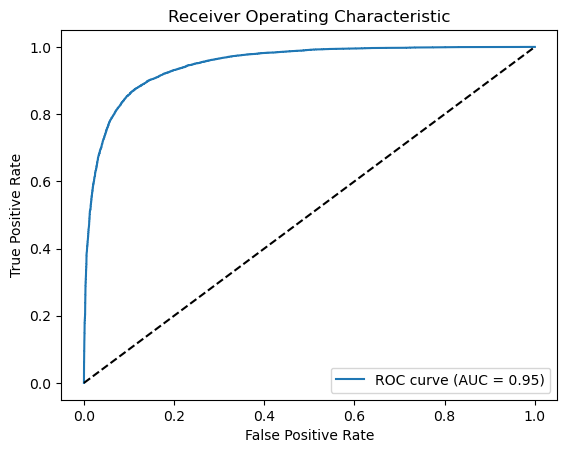

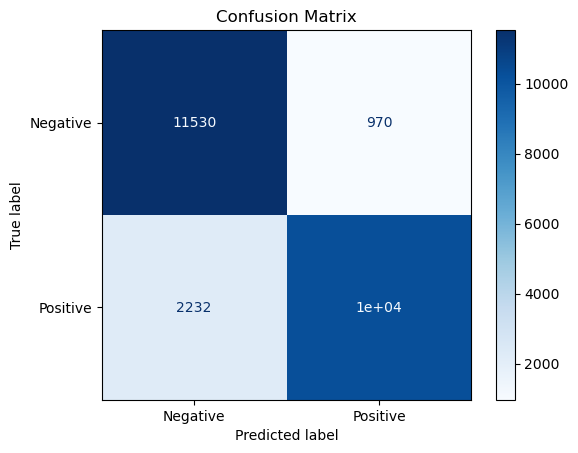

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_prob = model.predict(x_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()